# Wine com Regressão Logística  

Nesta prática, vamos prever a origem de um vinho a partir de suas características:

1. Volte ao notebook onde praticamos classificação de vinhos com kNN
2. Divida a base em treinamento e testes
3. Normalize a base corretamente
4. Crie o modelo de Regressão Logística
5. Utilize validação cruzada para avaliar o comportamento na base de treinamento com a variação de alguns parâmetros (ex.: solver e multiclass)
6. Treine o modelo com a melhor configuração, aplique-o na base de testes e avalie os resultados
7. Compare o resultado com o melhor resultado do kNN

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1. Volte ao notebook de classificação de vinhos c/ kNN

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np

data = datasets.load_wine()
wine = pd.DataFrame(data=np.c_[data['data'], 
                    data['target']],
                    columns=data['feature_names'] + ['target'])

**Data Exploration**

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [6]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


**Data Visualization**

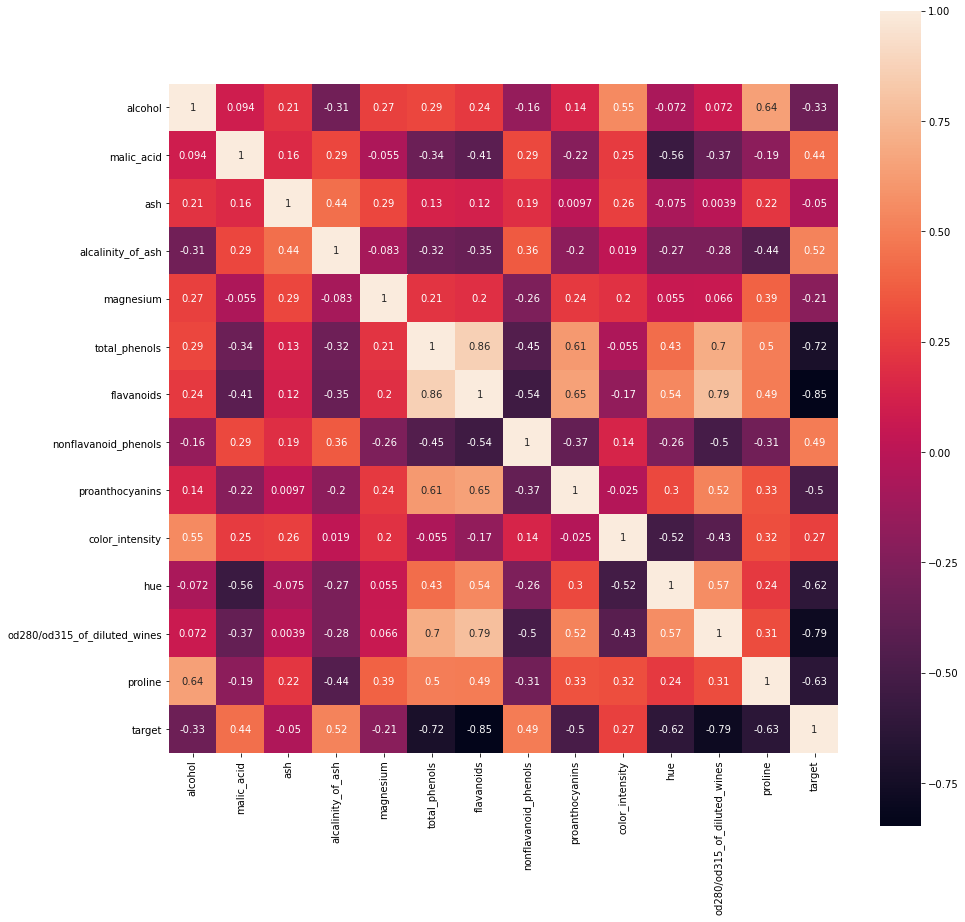

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(wine.corr(),
            annot=True,
            square=True)

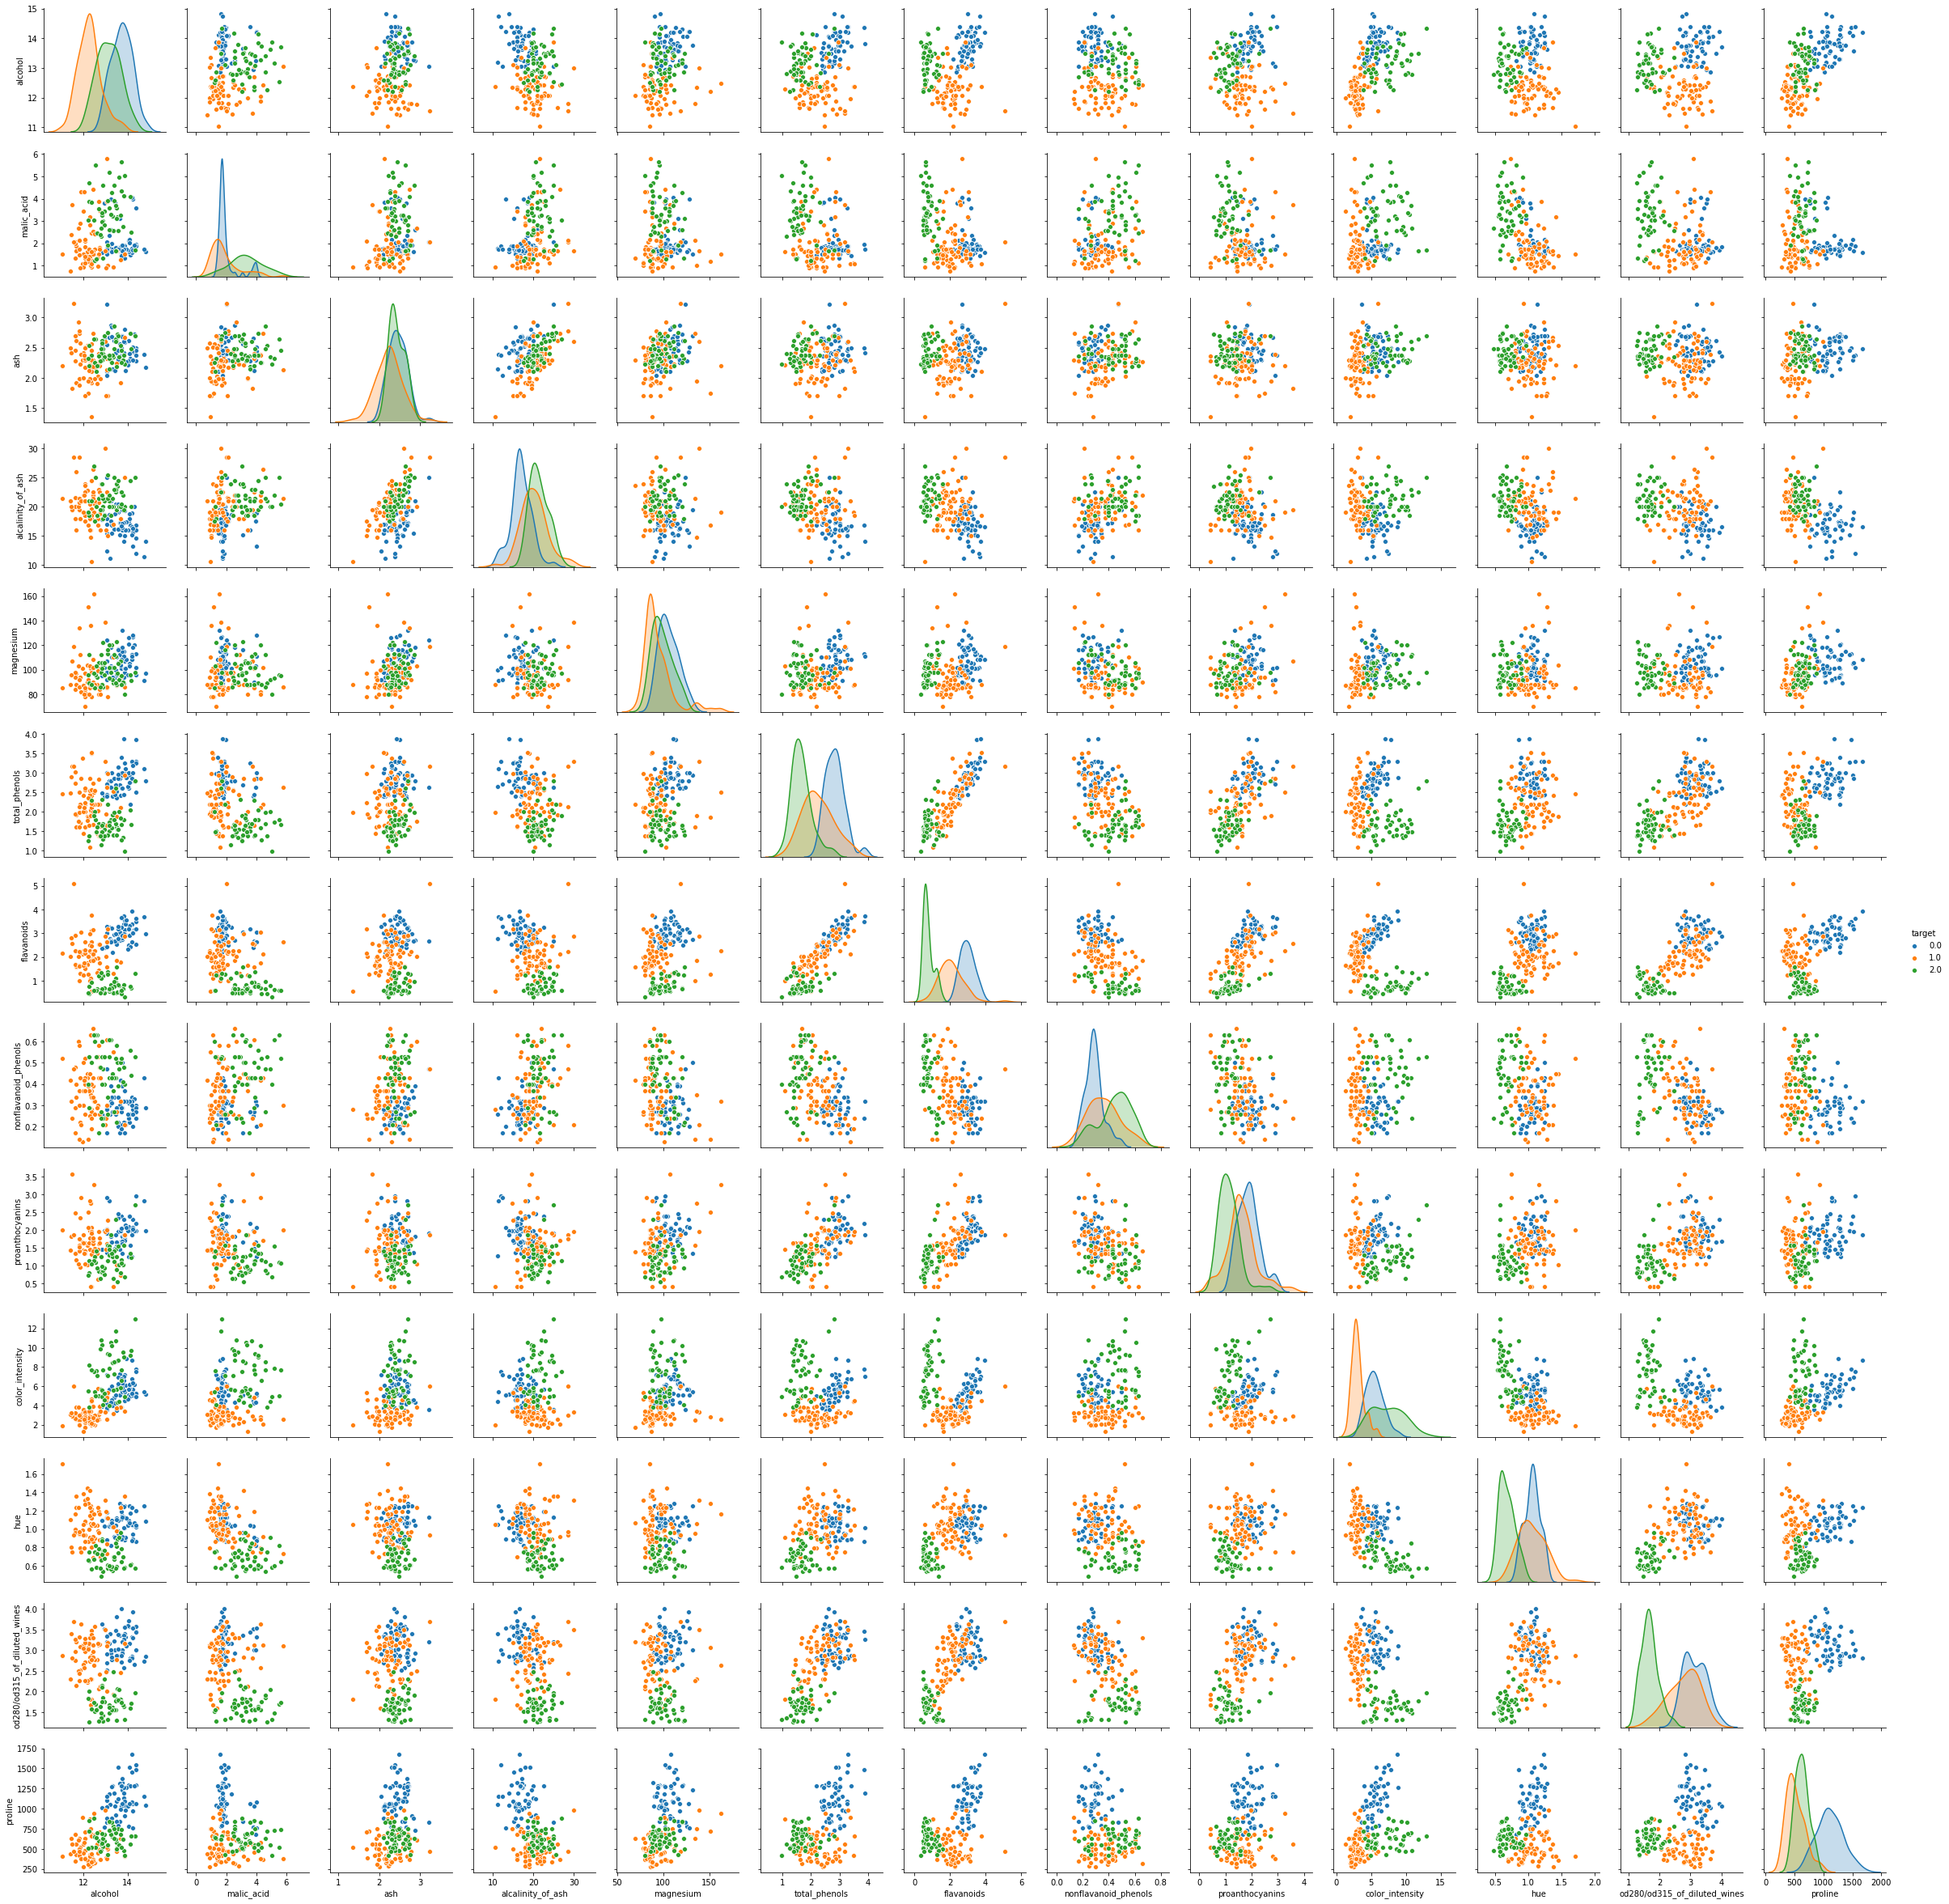

In [7]:
import seaborn as sns

# pairplot
features = list(wine.columns[:-1])
sns.pairplot(wine,
             vars=features,
             hue='target')

### 2. Divida a base em treinamento e testes

In [8]:
from sklearn.model_selection import train_test_split

y = wine['target']
X = wine.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

# Note on stratify: 
# if 'y' is a binary categorical variable w/ values
# 0 and 1 and there are 25% of zeros and 75% of ones,
# stratify=y will make sure that your random split has
# 25% of 0's and 75% of 1's. this is specially necessary
# for imbalanced datasets.
#
# source: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

### 3/4. Normalize a base corretamente e crie o modelo de Regressão Logística

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('LR', LogisticRegression(random_state=42))])

# Note on 'Pipeline': 
# when not using pipeline, scaled features used for
# CV are separated into test and train fold, but the
# test fold already contains the info about training
# set as the whole training set (X_train) was used 
# for standardization. In a simpler note when model.fit()
# is done using cross-validation the features already 
# include info from the test-fold as StandardScaler.fit()
# was done on the whole training set.
#
# This may be bypassed with pipeline: StandardScaler() and model()
# are glued together -- ensuring that during cross validation
# the StandardScaler is fitted to only the training fold, exactly
# similar fold used for model.fit() 
#
# source: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

### 5. Utilize validação cruzada para avaliar o comportamento na base de treinamento com a variação de alguns parâmetros

In [10]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

In [51]:
from sklearn.model_selection import GridSearchCV
import numpy as np

hyperparameters = {'LR__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                   'LR__solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
                   'LR__multi_class': ['auto','ovr','multinomial'],
                   'LR__dual': [True, False],
                   'LR__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'LR__max_iter': np.arange(100, 500, 20).tolist()}

gscv  = GridSearchCV(pipeline, 
                     param_grid=hyperparameters, 
                     cv=kfold, 
                     scoring='neg_root_mean_squared_error',
                     n_jobs=-1)

# Note on 'scoring': 
# accuracy looks at fractions of correctly assigned
# positive and negative classes. That means if our
# problem is highly imbalanced we get a really high 
# accuracy score by simply predicting that all observations
# belong to the majority class. <<< D: 
# ...even the worst models may have a very high accuracy.
#
# source: https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

In [52]:
import json

gscv_result = gscv.fit(X_train, y_train)

print("GridSearchCV Best: ", gscv_result.best_score_)
print("Parameters:\n", json.dumps(gscv_result.best_params_, indent=2))

GridSearchCV Best:  -0.05660252327074274
Parameters:
 {
  "LR__C": 1,
  "LR__dual": false,
  "LR__max_iter": 100,
  "LR__multi_class": "auto",
  "LR__penalty": "l1",
  "LR__solver": "liblinear"
}


### 6. Treine o modelo com a melhor configuração, aplique-o na base de testes e avalie os resultados

**Treine o modelo com a melhor configuração e aplique-o na base de testes**

In [55]:
best_estimator = gscv_result.best_estimator_
best_estimator.fit(X_train,  y_train)
y_pred = best_estimator.predict(X_test)

print(y_pred)

[0. 1. 0. 0. 0. 0. 2. 1. 1. 2. 1. 1. 2. 1. 0. 2. 1. 0. 2. 2. 1. 2. 2. 2.
 0. 2. 0. 1. 0. 1. 0. 1. 2. 1. 1. 2. 1. 1. 1. 0. 2. 0. 0. 0. 0. 1. 1. 0.
 2. 0. 1. 1. 2. 0.]


**Avalie os resultados**

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import numpy as np

mae    = mean_absolute_error(y_test, y_pred)
mse    = mean_squared_error(y_test, y_pred)
rmse   = np.sqrt(mean_squared_error(y_test, y_pred))
r_sqrd = r2_score(y_test, y_pred)

print(f"Mean Absolute Error   : {mae:.2f}")
print(f"Mean Squared Error    : {mse:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"R-Squared             : {r_sqrd:.2f}")

Mean Absolute Error   : 0.02
Mean Squared Error    : 0.02
Root Mean Square Error: 0.14
R-Squared             : 0.97


In [57]:
from sklearn.metrics import confusion_matrix, classification_report

cfr = classification_report(y_test, y_pred)
print("\nClassification Report:\n\n", cfr)

cfm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n\n", cfm)


Classification Report:

               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        18
         1.0       1.00      0.95      0.98        21
         2.0       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Confusion Matrix:

 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


### 7. Compare o resultado com o melhor resultado do kNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn   = KNeighborsClassifier(n_neighbors=24)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# CV metrics
scores_knn = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')

# fit and predict for other metrics
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN CV Mean Score: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))
print("KNN CV Scores: ", scores_knn)

KNN CV Mean Score: 0.70 (+/- 0.22)
KNN CV Scores:  [0.53846154 0.84615385 0.61538462 0.61538462 0.83333333 0.75
 0.58333333 0.75       0.66666667 0.83333333]


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, accuracy_score
import numpy as np

mae    = mean_absolute_error(y_test, y_pred_knn)
mse    = mean_squared_error(y_test, y_pred_knn)
rmse   = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r_sqrd = r2_score(y_test, y_pred_knn)

print(f"Mean Absolute Error   : {mae:.2f}")
print(f"Mean Squared Error    : {mse:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"R-Squared             : {r_sqrd:.2f}")

Mean Absolute Error   : 0.37
Mean Squared Error    : 0.56
Root Mean Square Error: 0.75
R-Squared             : 0.09


In [61]:
from sklearn.metrics import confusion_matrix, classification_report

cfr_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report:\n\n", cfr_knn)

cfm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:\n\n", cfm_knn)


Classification Report:

               precision    recall  f1-score   support

         0.0       0.88      0.83      0.86        18
         1.0       0.82      0.67      0.74        21
         2.0       0.50      0.67      0.57        15

    accuracy                           0.72        54
   macro avg       0.74      0.72      0.72        54
weighted avg       0.75      0.72      0.73        54


Confusion Matrix:

 [[15  0  3]
 [ 0 14  7]
 [ 2  3 10]]
